In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [67]:
dataset = [
    (1, 2),
    (2, 4),
    (3, 4),
    (2, 1),
    (5, 6),
    (5, 3),
    (4, 5),
    (9, 1),
    (6, 7),
    (8, 4),
    (9, 6),
    (9, 9),
    (8, 7)
]


In [68]:
from matplotlib import pyplot as plt

def desenhaClusters(c0, c1, cluster0, cluster1):
    x10 = []
    x20 = []
    for c in cluster0:
        x10.append(c[0])
        x20.append(c[1])
    x11 = []
    x21 = []
    for c in cluster1:
        x11.append(c[0])
        x21.append(c[1])
    ct1 = [c0[0], c1[0]]
    ct2 = [c0[1], c1[1]]
    plt.scatter(x10, x20, c="green")
    plt.scatter(x11, x21, c="blue")
    plt.scatter(ct1, ct2, c="pink", marker="^")
    plt.show()

In [69]:
cluster0 = [dataset[0]]
cluster1 = [dataset[1]]

In [70]:
def centroide(cluster):
    sx1 = 0
    sx2 = 0
    for x in cluster:
        sx1 += x[0]
        sx2 += x[1]
    return (sx1/len(cluster), sx2/len(cluster))

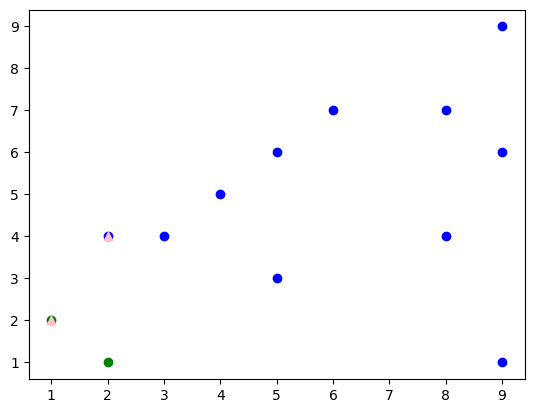

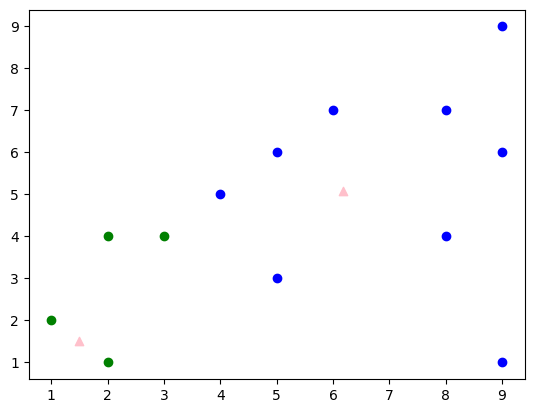

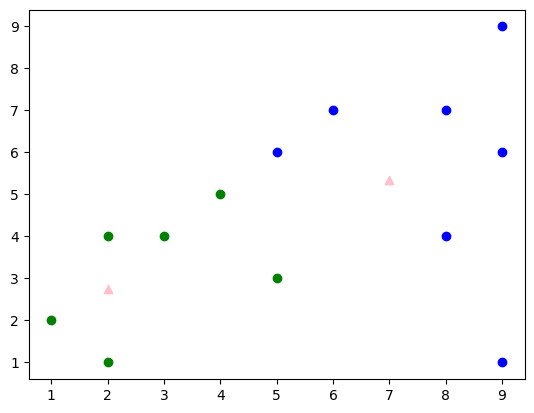

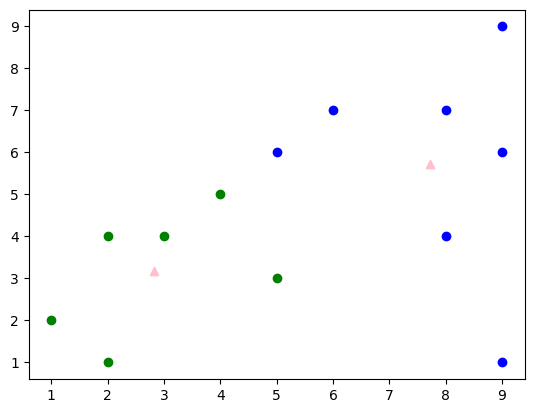

In [71]:
import math

def definirCluster(x, c0, c1):
    d0 = math.sqrt((x[0] - c0[0]) ** 2 + (x[1] - c0[1]) ** 2)
    d1 = math.sqrt((x[0] - c1[0]) ** 2 + (x[1] - c1[1]) ** 2)
    
    if d0 < d1:
        return 0
    
    return 1

def existeElemento(procurado, cluster):
    for c in cluster:
        if c[0] == procurado[0] and c[1] == procurado[1]:
            return True
    return False

def mudou(cluster_antigo, cluster_novo):
    
    if len(cluster_antigo) != len(cluster_novo):
        return True

    for c in cluster_antigo:
        if not existeElemento(c, cluster_novo):
            return True
        
    return False

terminou = False
while not terminou:
    # encontrar o valor dos centróides dos clusters atuais
    c0 = centroide(cluster0)
    c1 = centroide(cluster1)
    # 
    novo_cluster0 = []
    novo_cluster1 = []
    for x in dataset:
        cluster = definirCluster(x, c0, c1)
        if cluster == 0:
            novo_cluster0.append(x)
        else:
            novo_cluster1.append(x)
    terminou = not mudou(cluster0, novo_cluster0) and not mudou(cluster1, novo_cluster1)
    cluster0 = novo_cluster0
    cluster1 = novo_cluster1
    desenhaClusters(c0, c1, cluster0, cluster1)

In [72]:
cluster0

[(1, 2), (2, 4), (3, 4), (2, 1), (5, 3), (4, 5)]

In [73]:
cluster1

[(5, 6), (9, 1), (6, 7), (8, 4), (9, 6), (9, 9), (8, 7)]

In [74]:
c0

(2.8333333333333335, 3.1666666666666665)

In [75]:
c1

(7.714285714285714, 5.714285714285714)